In [6]:
# Import libraries and data
import os
import numpy as np
import pickle


from config.settings import ROOT_DIR, saved_models_path
from src.utils.linear_regressor import perform_linear_regression
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns




# Distance model (5 parameters)
Here we solve the following model

$$ s_i(k+1) = s_i(k) +\theta_{s_1}  s_i(k-1) +\theta_{s_2} s_i(k-2) +\theta_{s_3} v_i(k)   +\theta_{s_4} v_i(k-1) 
+\theta_{s_5} a_i(k)$$



## Data shifting


In [3]:
X_x= np.vstack((
    s_x[2:-1],        #s[k]   
    s_x[1:-2],        #s[k-1]
    s_x[ :-3],        #s[k-2]
    v_x[2:-1],        #v[k]
    v_x[1:-2],        #v[k-1]
    a_x[2:-1]         #a[k]
    )).T

y_x = s_x[3:]
print("A matrix: " + str(X_x.shape))
print("target matrix: " + str(np.array(y_x).shape))

A matrix: (205272, 6)
target matrix: (205272,)


In [4]:
X_y = np.vstack((
    s_y[2:-1],        #s[k]   
    s_y[1:-2],        #s[k-1]
    s_y[ :-3],        #s[k-2]
    v_y[2:-1],        #v[k]
    v_y[1:-2],        #v[k-1]
    a_y[2:-1]         #a[k]
    )).T

y_y = s_y[3:]
print("A matrix: " + str(X_y.shape))
print("target matrix: " + str(np.array(y_y).shape))

A matrix: (205272, 6)
target matrix: (205272,)


### Perform Linear Regression


Linear regression with 6 parameters
Mean Squared Error (MSE): 2.0073e+01
Mean Absolute Error (MAE): 4.6942e-01
R-squared (R²) Score: 9.8860e-01
Coefficients:
0.9904864212924135
0.0002716181697085987
-7.953358114314761e-05
0.04315104492759223
-0.0027821611585432285
-0.03824475167448535


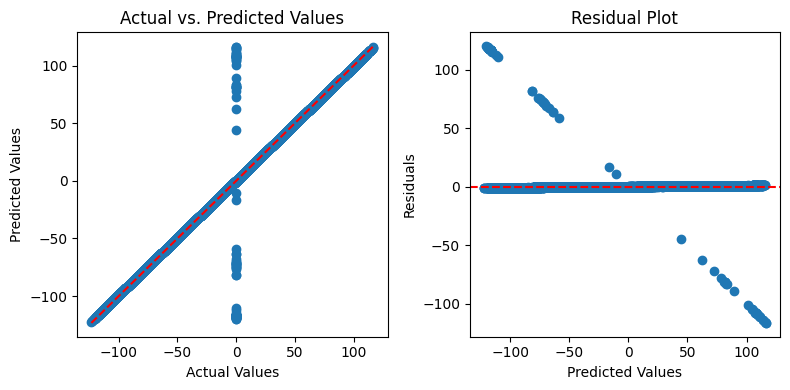

Mean Squared Error (MSE): 7.0975e+00
Mean Absolute Error (MAE): 2.8284e-01
R-squared (R²) Score: 9.9143e-01
Coefficients:
0.9923546479674336
0.0024685071646078963
0.00013285749894655476
0.03948852421639509
-0.021660017890233488
-0.03848885919232349


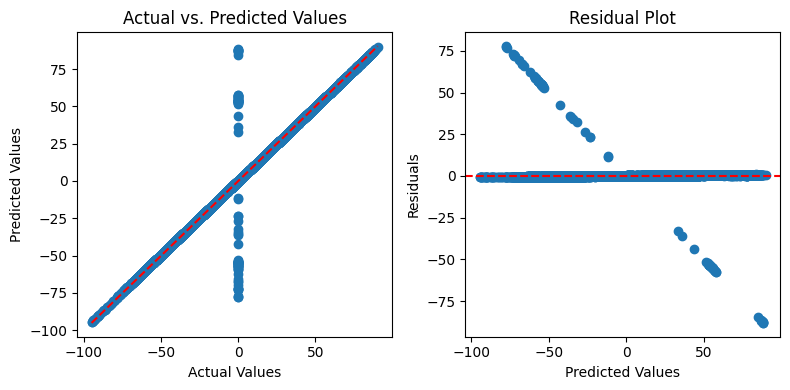

In [7]:
print("Linear regression with 6 parameters")
first_model = perform_linear_regression(X_x, y_x)
second_model = perform_linear_regression(X_y, y_y)

In [9]:
# Save both models in a pickle file
def save_model(model, model_name):
    model_file_path = os.path.join(saved_models_path, f'dist_model_5/{model_name}.pkl')
    
    with open(model_file_path, 'wb') as file:
        pickle.dump(model, file)
    
    print(f'Model "{model_name}" saved to: {model_file_path}')

save_model(first_model, 'first_model')
save_model(second_model, 'second_model')



Model "first_model" saved to: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/dist_model_5/first_model.pkl
Model "second_model" saved to: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/dist_model_5/second_model.pkl
